In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data/penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
# dropping the rows which has null values
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [10]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [11]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [12]:
df[df["sex"]=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [14]:
# most likely FEMALE
df[df["species"]=="Gentoo"].groupby("sex").describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [15]:
df.at[336, "sex"] = "FEMALE"

In [16]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

C:\Users\kokye\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


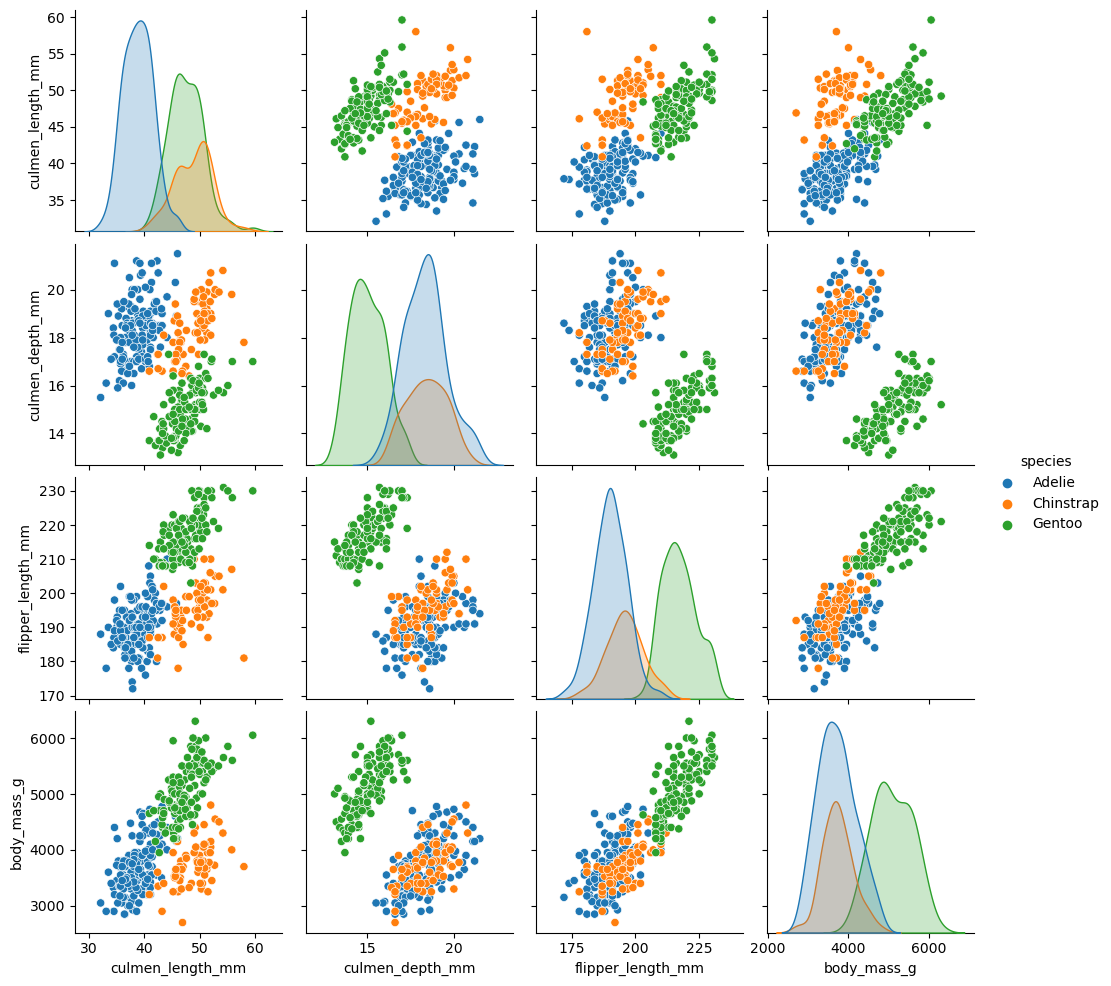

In [17]:
sns.pairplot(df, hue="species")

C:\Users\kokye\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


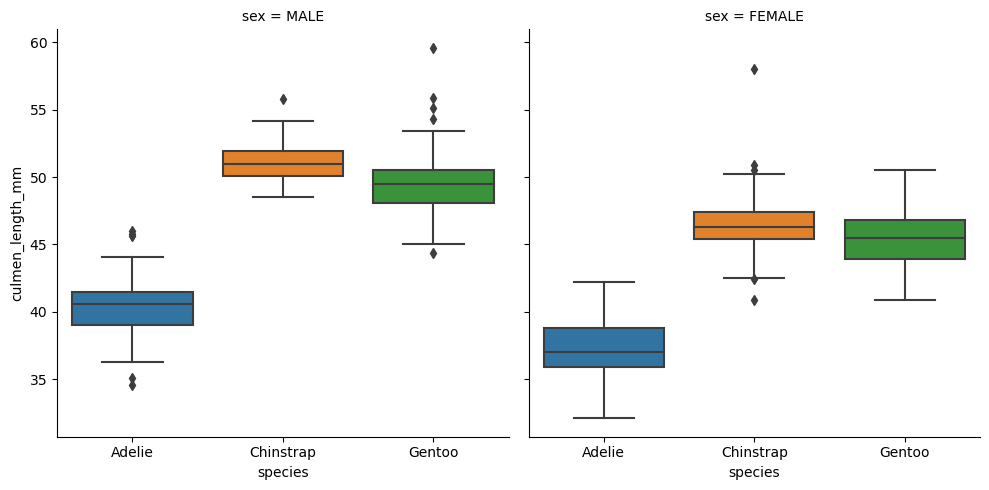

In [19]:
sns.catplot(x="species", y="culmen_length_mm", data=df, 
           kind="box", col="sex")

In [21]:
# tree-based methods does not support multi-categorical string data (island column) 
X = pd.get_dummies(df.drop("species", axis=1), drop_first=True)

In [22]:
y = df["species"]

In [23]:
# does not require scaling
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
model = DecisionTreeClassifier()

In [27]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
base_preds = model.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [31]:
print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        15
   Chinstrap       0.88      0.88      0.88         8
      Gentoo       1.00      1.00      1.00        11

    accuracy                           0.94        34
   macro avg       0.94      0.94      0.94        34
weighted avg       0.94      0.94      0.94        34



In [43]:
confusion_matrix(y_test, base_preds, labels=df["species"].unique())

array([[14,  1,  0],
       [ 1,  7,  0],
       [ 0,  0, 11]], dtype=int64)

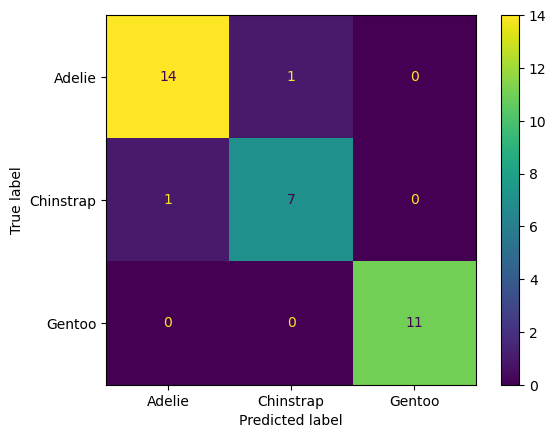

In [47]:
ConfusionMatrixDisplay(confusion_matrix(y_test, base_preds, labels=df["species"].unique()), 
                       display_labels=df["species"].unique()).plot()

In [59]:
# verify confusion matrix
y_test.value_counts()

species
Adelie       15
Gentoo       11
Chinstrap     8
Name: count, dtype: int64

In [61]:
model.feature_importances_

array([0.36391079, 0.07797887, 0.51874038, 0.        , 0.03152449,
       0.        , 0.00784546])

In [62]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [67]:
pd.DataFrame(index=X.columns, data=model.feature_importances_,
            columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)

,Feature Importance
flipper_length_mm,0.518740
culmen_length_mm,0.363911
culmen_depth_mm,0.077979
island_Dream,0.031524
sex_MALE,0.007845
body_mass_g,0.000000
island_Torgersen,0.000000


In [68]:
from sklearn.tree import plot_tree

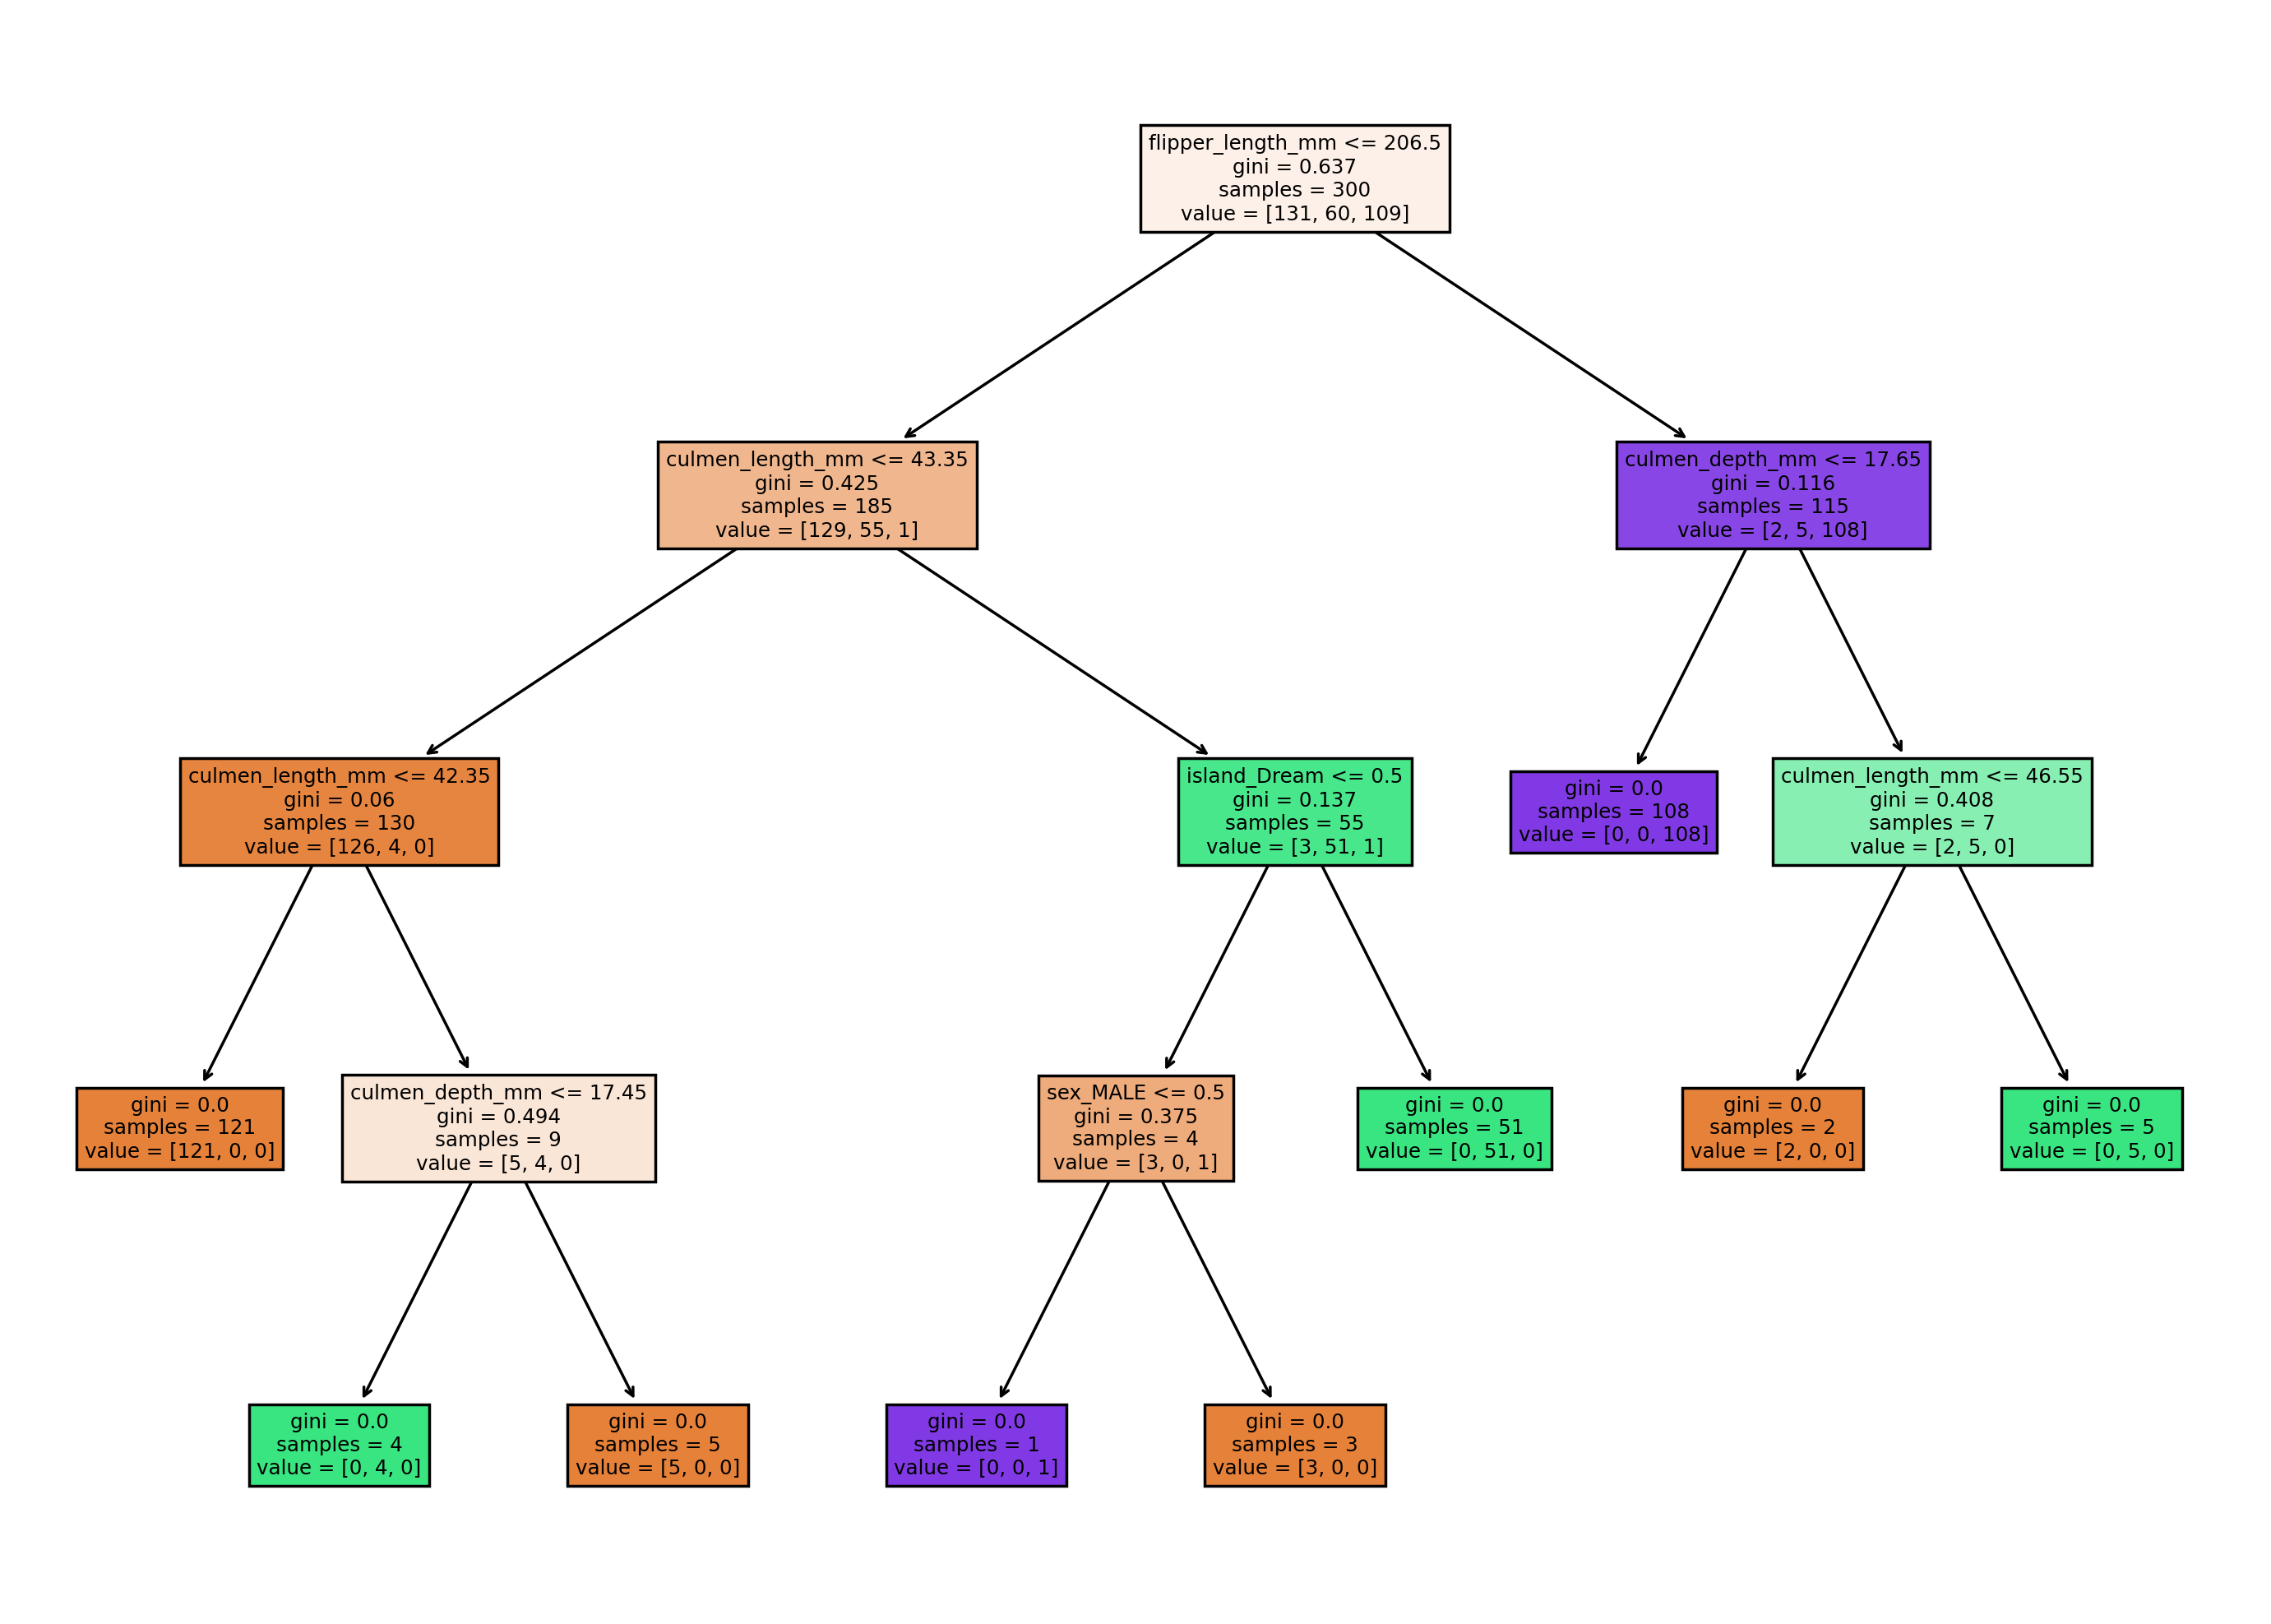

In [76]:
plt.figure(figsize=(14, 10), dpi=250)
plot_tree(model, feature_names=list(X.columns), filled=True);

* flipper_length_mm, the most important feature is used first
* when the gini value is 0, the data is classified perfectly
* This is usually when it is [0, 0, ...], or [..., 0, 0] or [0, ..., 0]

In [77]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print("\n")
    plt.figure(figsize=(14, 10), dpi=250)
    plot_tree(model, feature_names=list(X.columns), filled=True);

              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        15
   Chinstrap       0.88      0.88      0.88         8
      Gentoo       1.00      1.00      1.00        11

    accuracy                           0.94        34
   macro avg       0.94      0.94      0.94        34
weighted avg       0.94      0.94      0.94        34





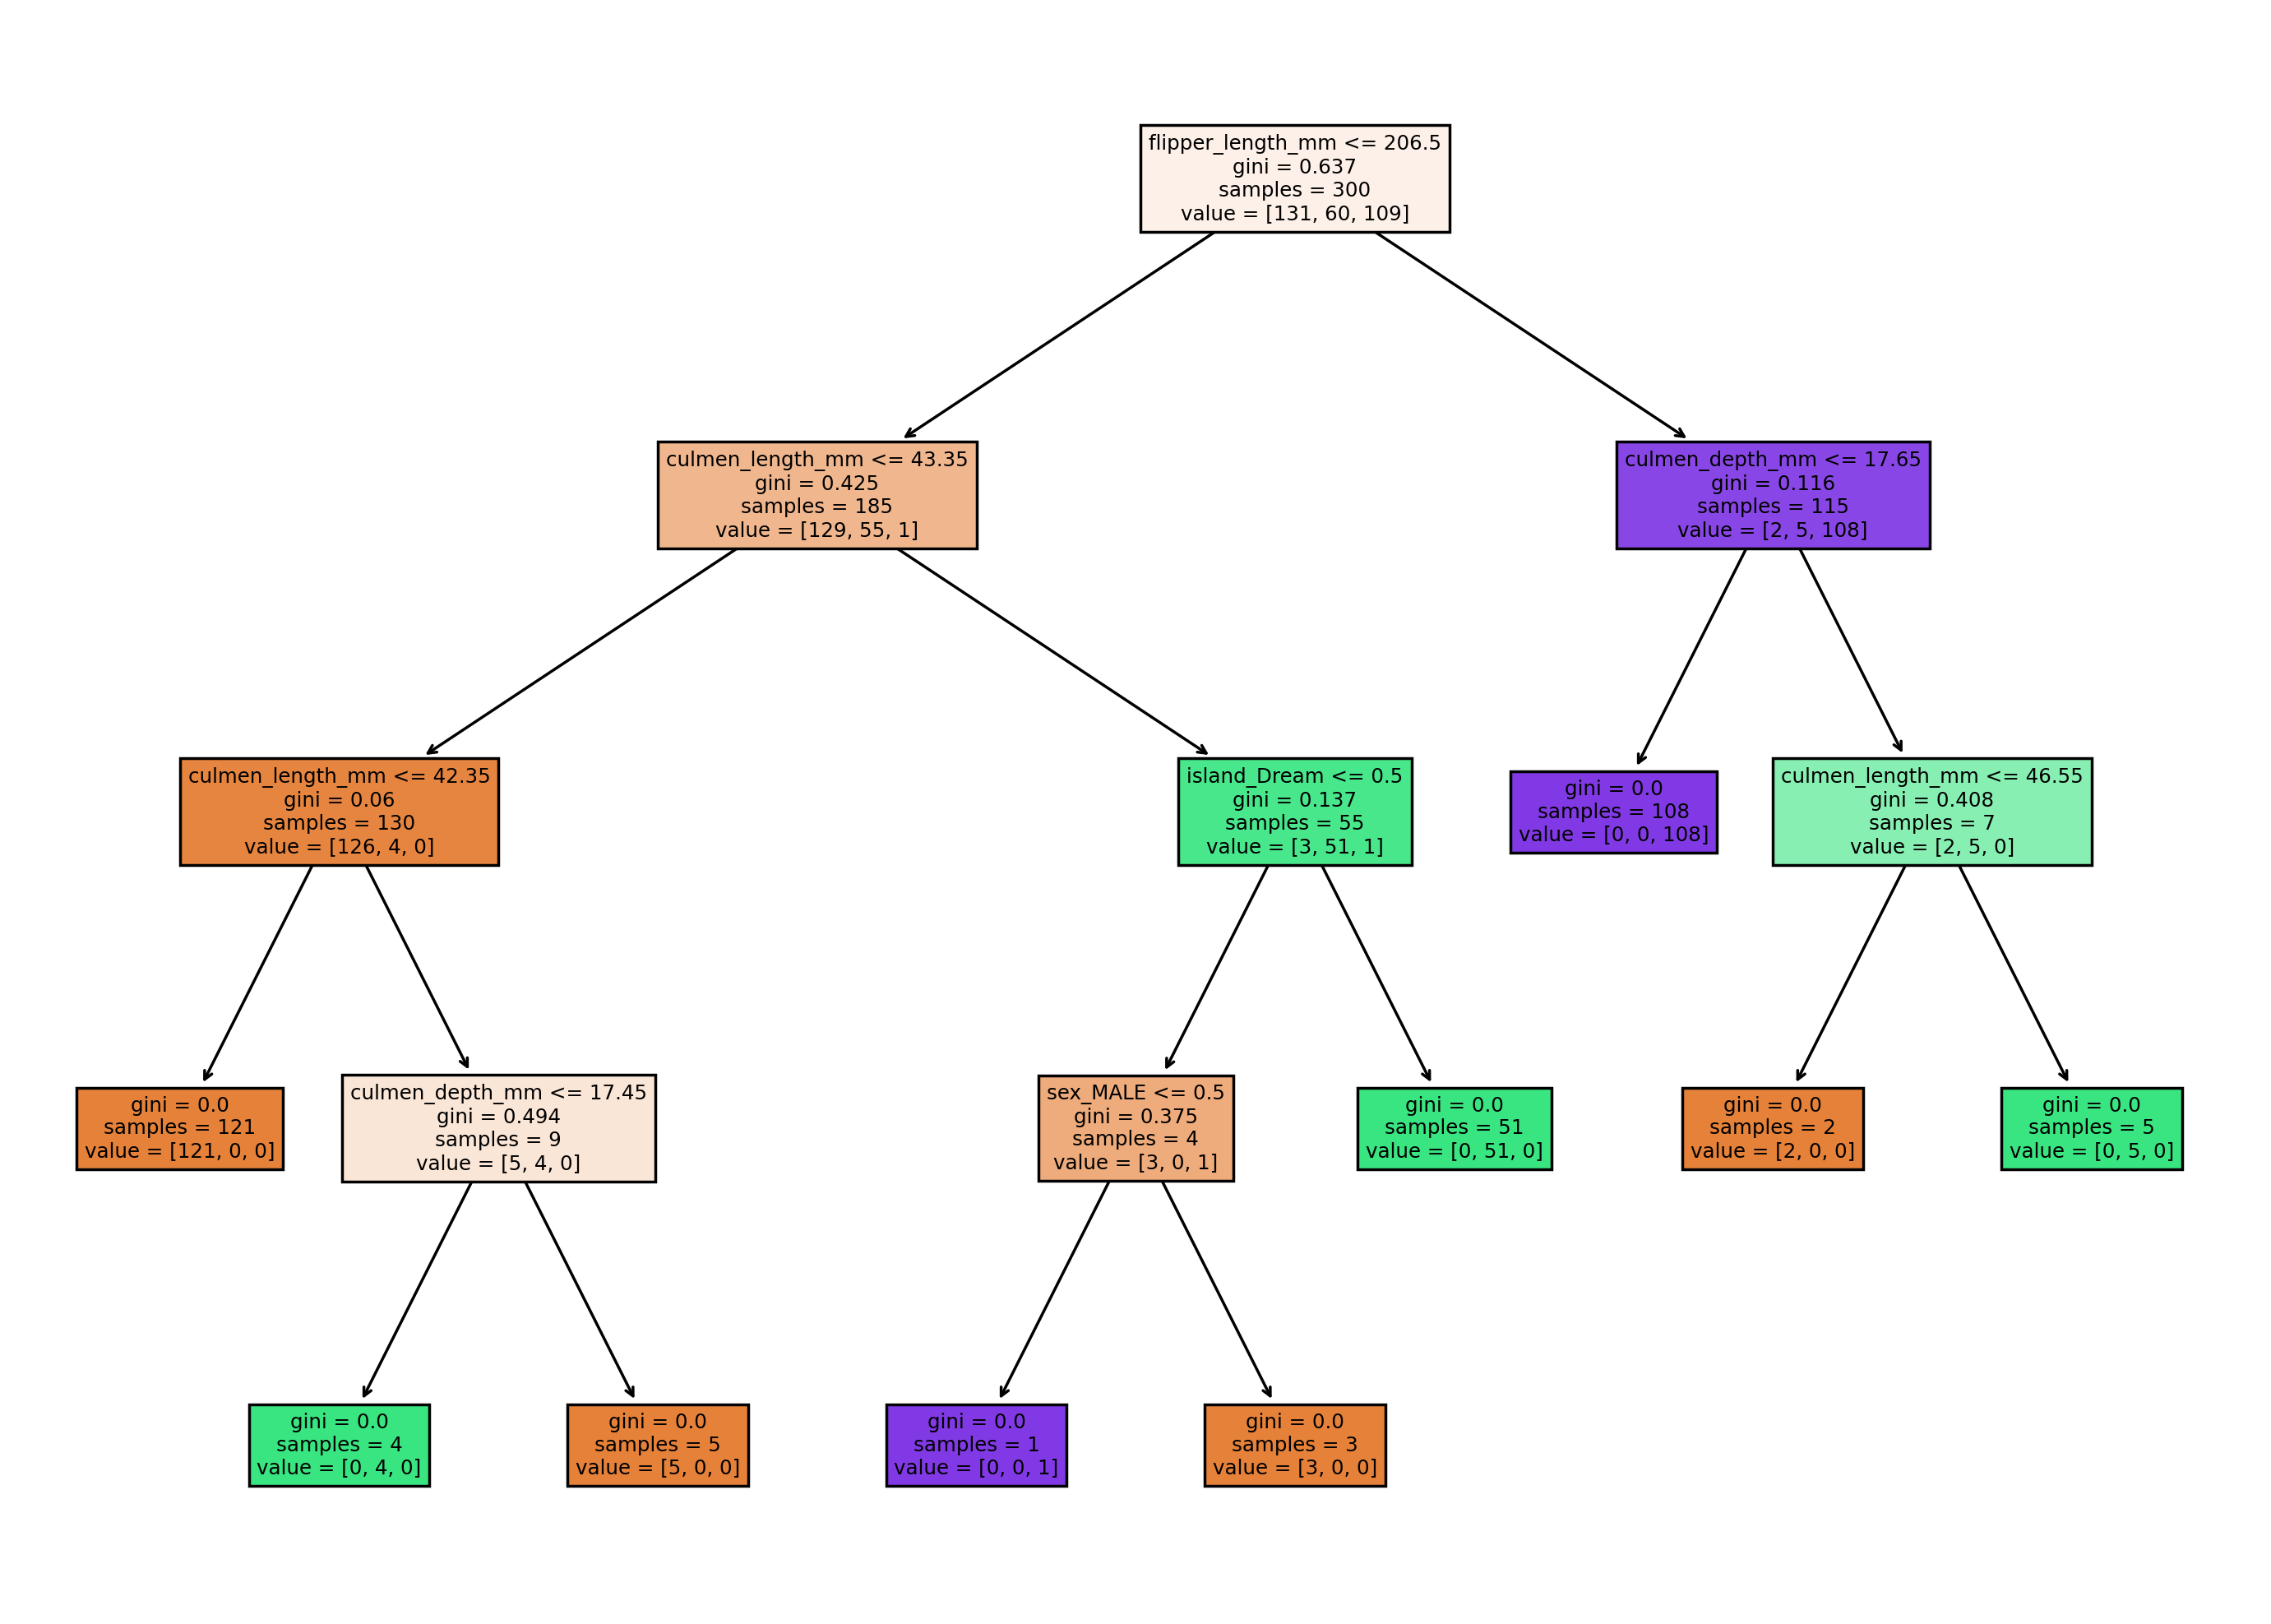

In [78]:
report_model(model)

In [79]:
# explore hyperparameters
pruned_tree = DecisionTreeClassifier(max_depth=2)

In [81]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        15
   Chinstrap       0.88      0.88      0.88         8
      Gentoo       1.00      1.00      1.00        11

    accuracy                           0.94        34
   macro avg       0.94      0.94      0.94        34
weighted avg       0.94      0.94      0.94        34





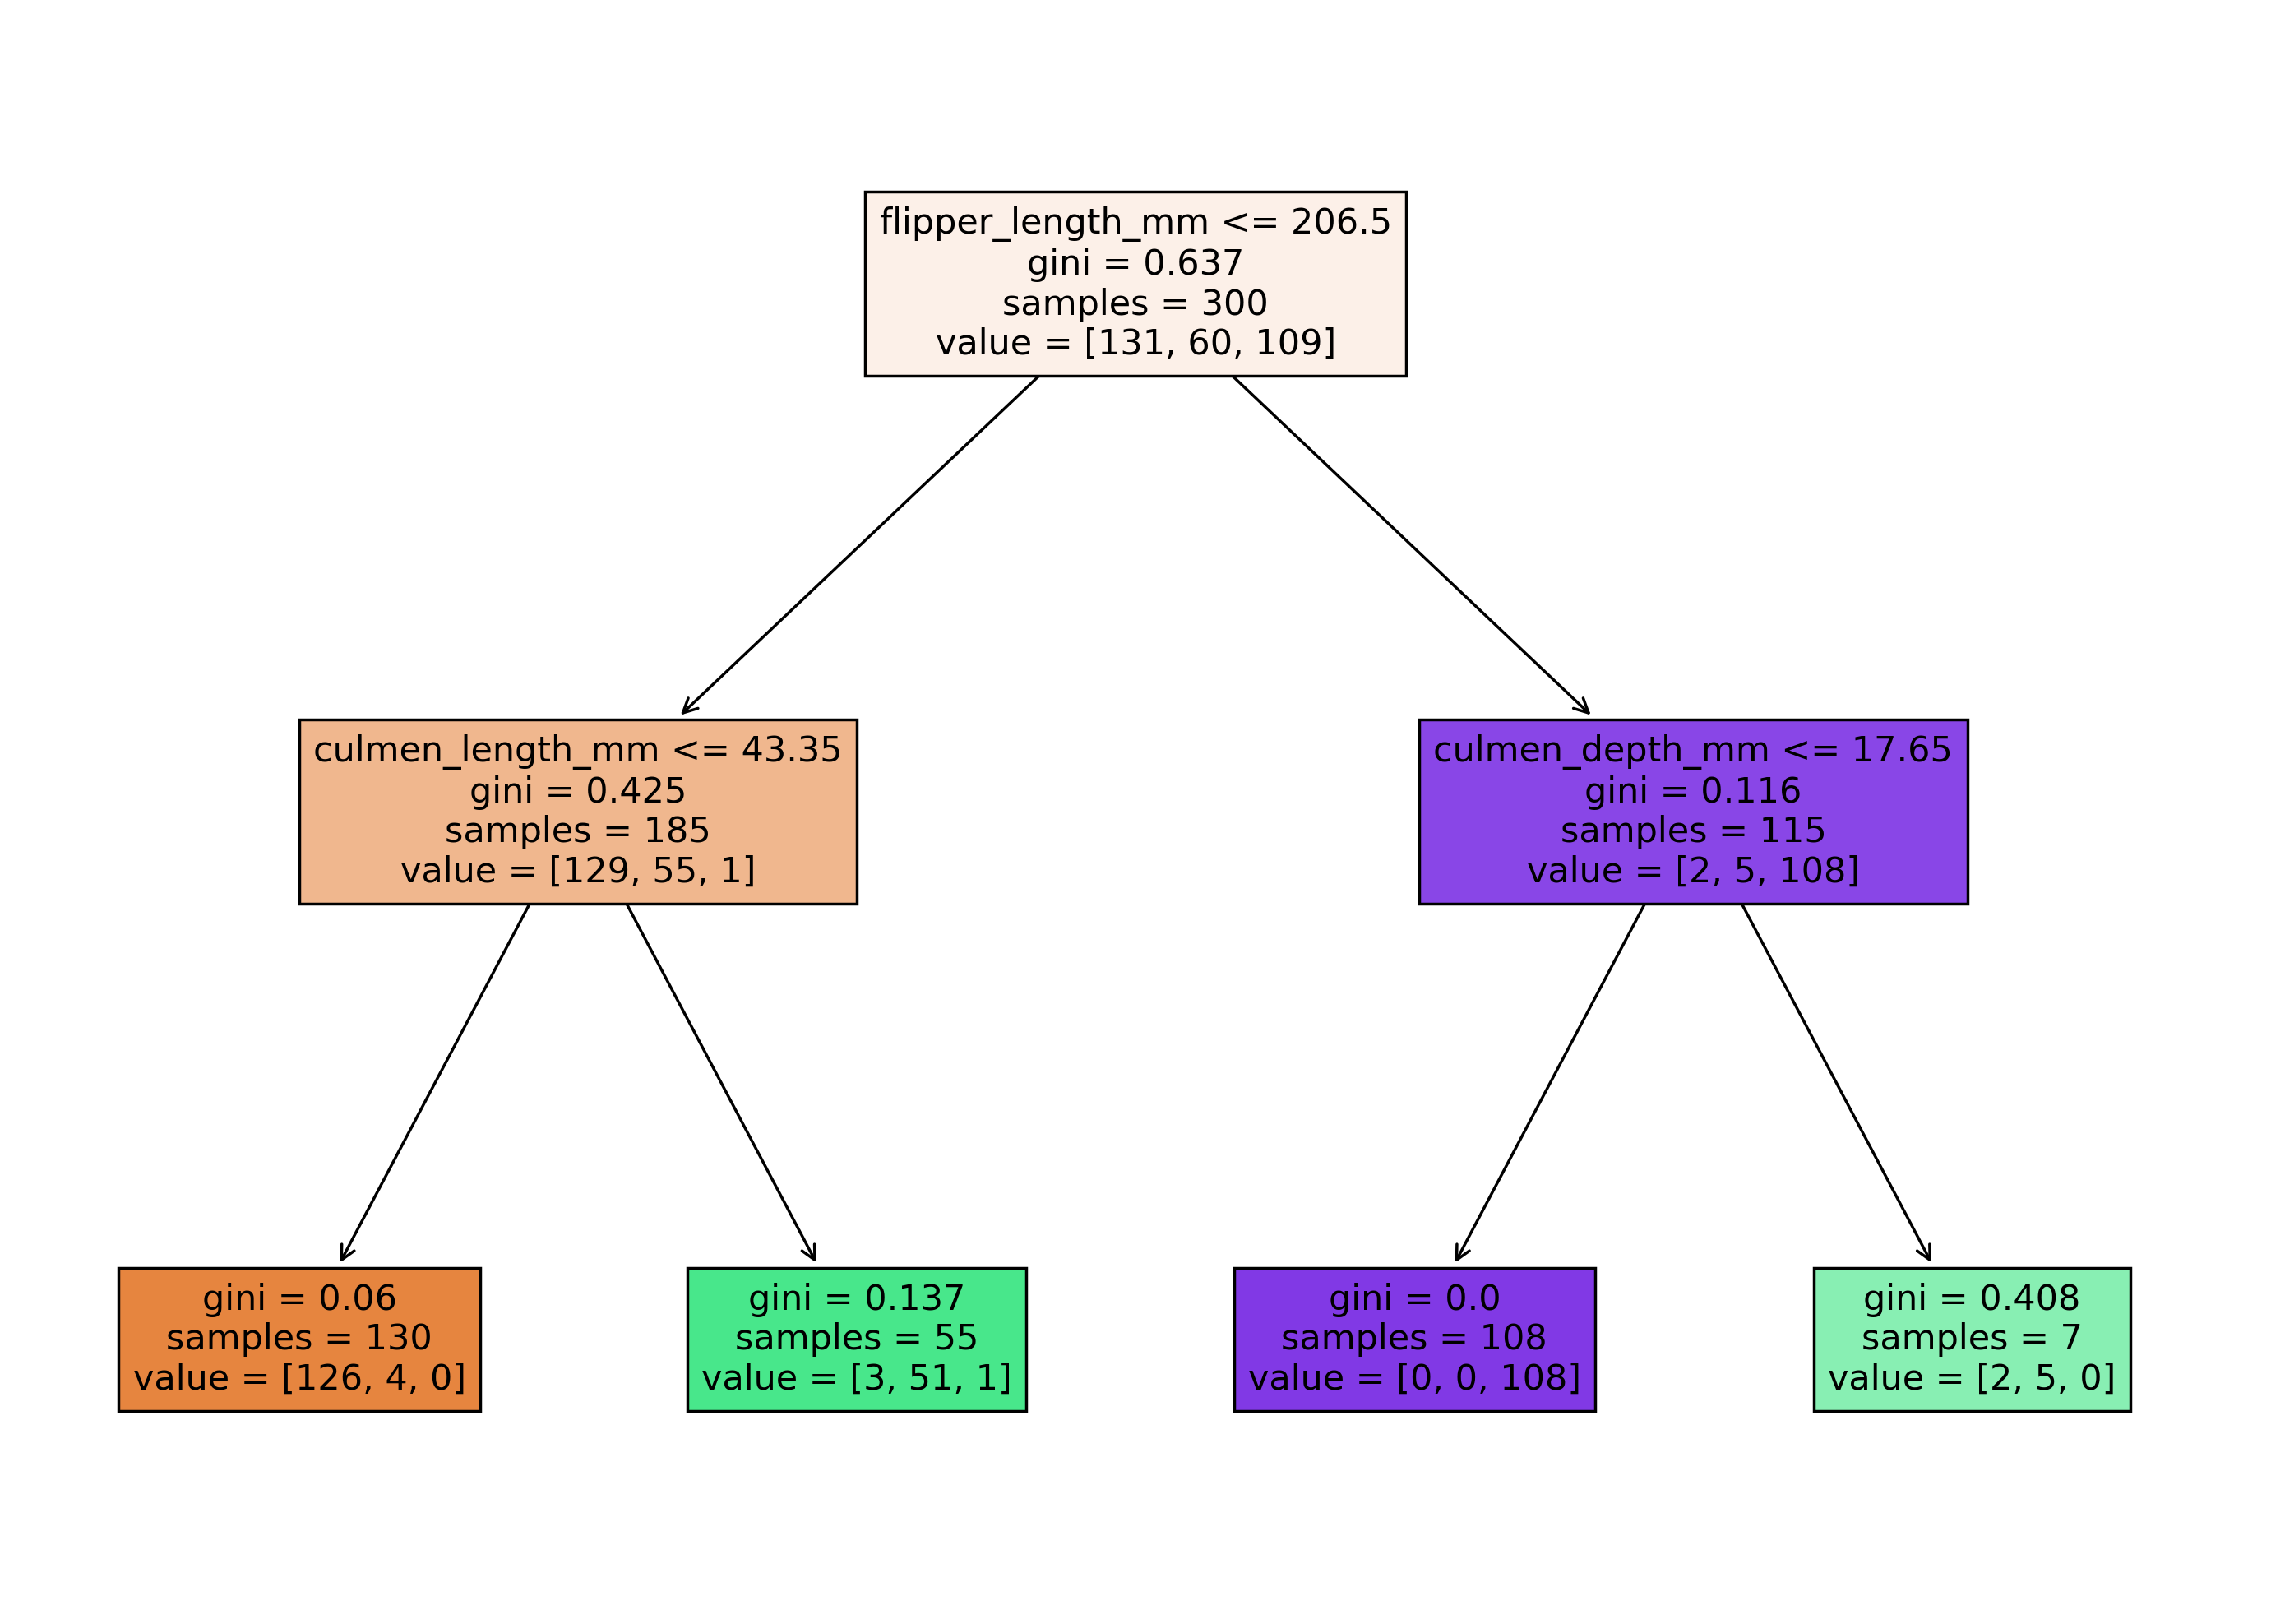

In [82]:
report_model(pruned_tree)

In [83]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

In [84]:
# only considers 3 leafs
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=3)

In [85]:
max_leaf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        15
   Chinstrap       0.88      0.88      0.88         8
      Gentoo       1.00      1.00      1.00        11

    accuracy                           0.94        34
   macro avg       0.94      0.94      0.94        34
weighted avg       0.94      0.94      0.94        34





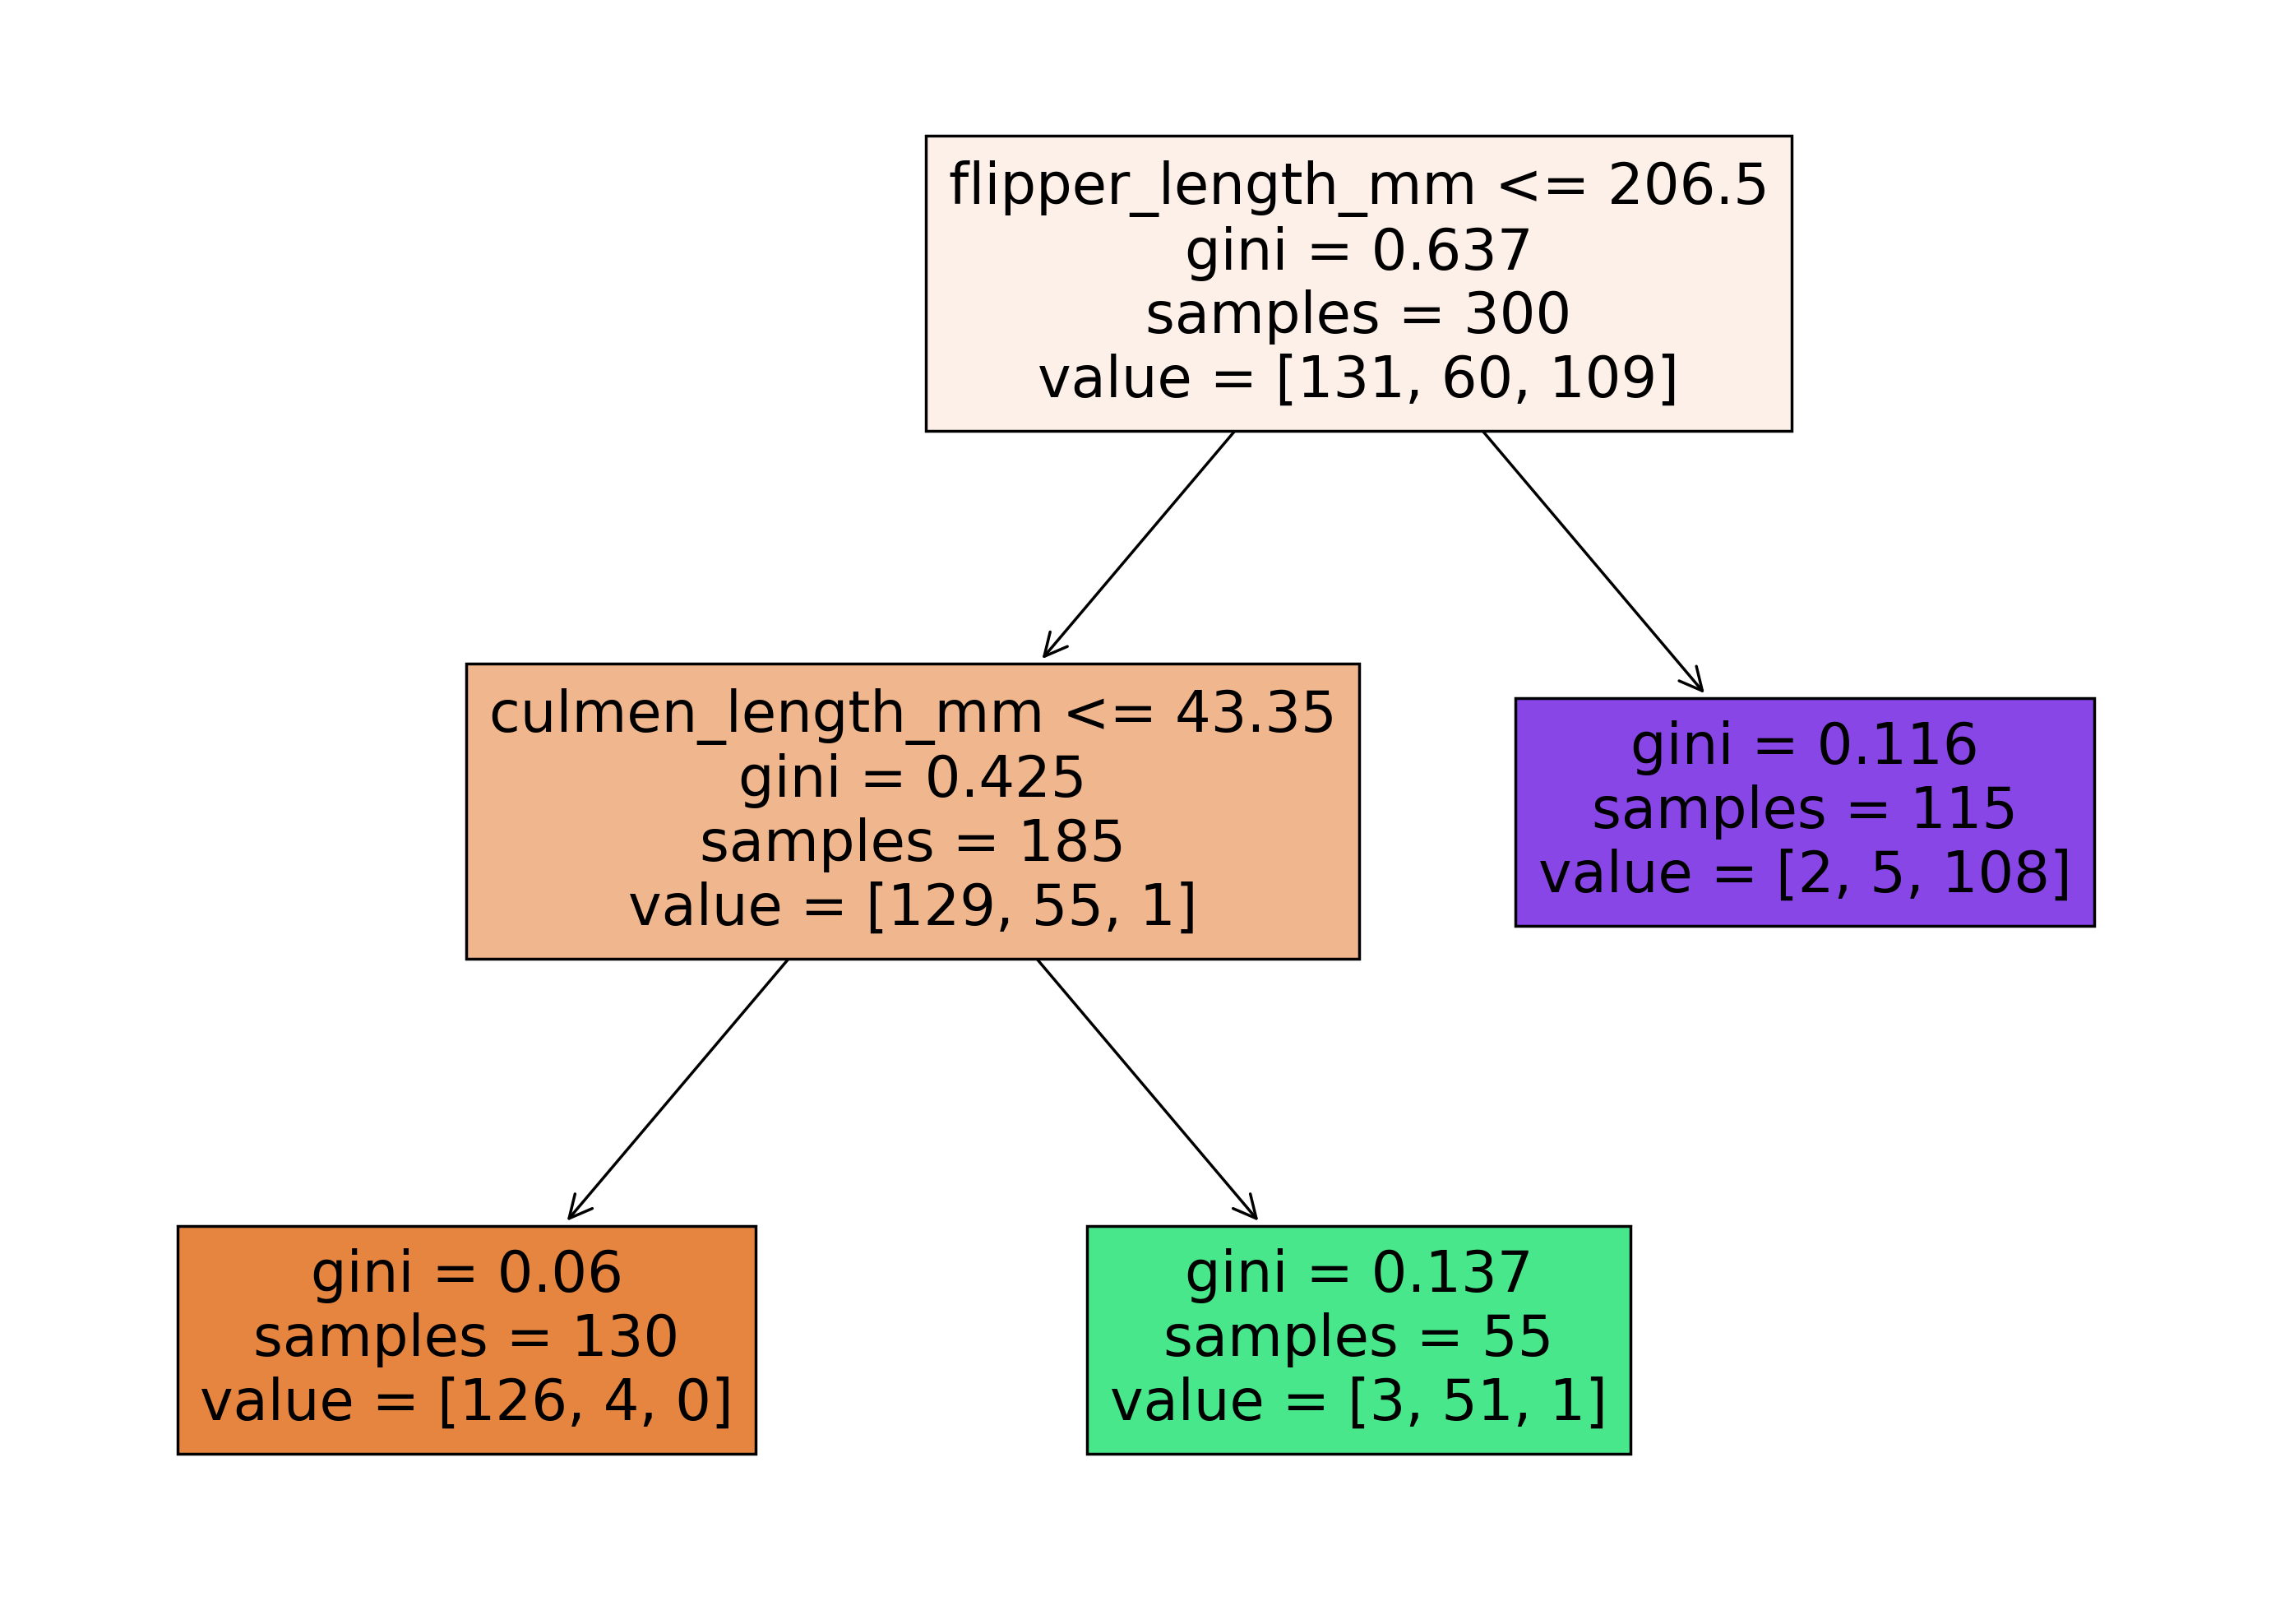

In [86]:
report_model(max_leaf_tree)

In [87]:
# criterion is set to entropy
entropy_tree = DecisionTreeClassifier(criterion="entropy")

In [88]:
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        15
   Chinstrap       0.88      0.88      0.88         8
      Gentoo       1.00      1.00      1.00        11

    accuracy                           0.94        34
   macro avg       0.94      0.94      0.94        34
weighted avg       0.94      0.94      0.94        34





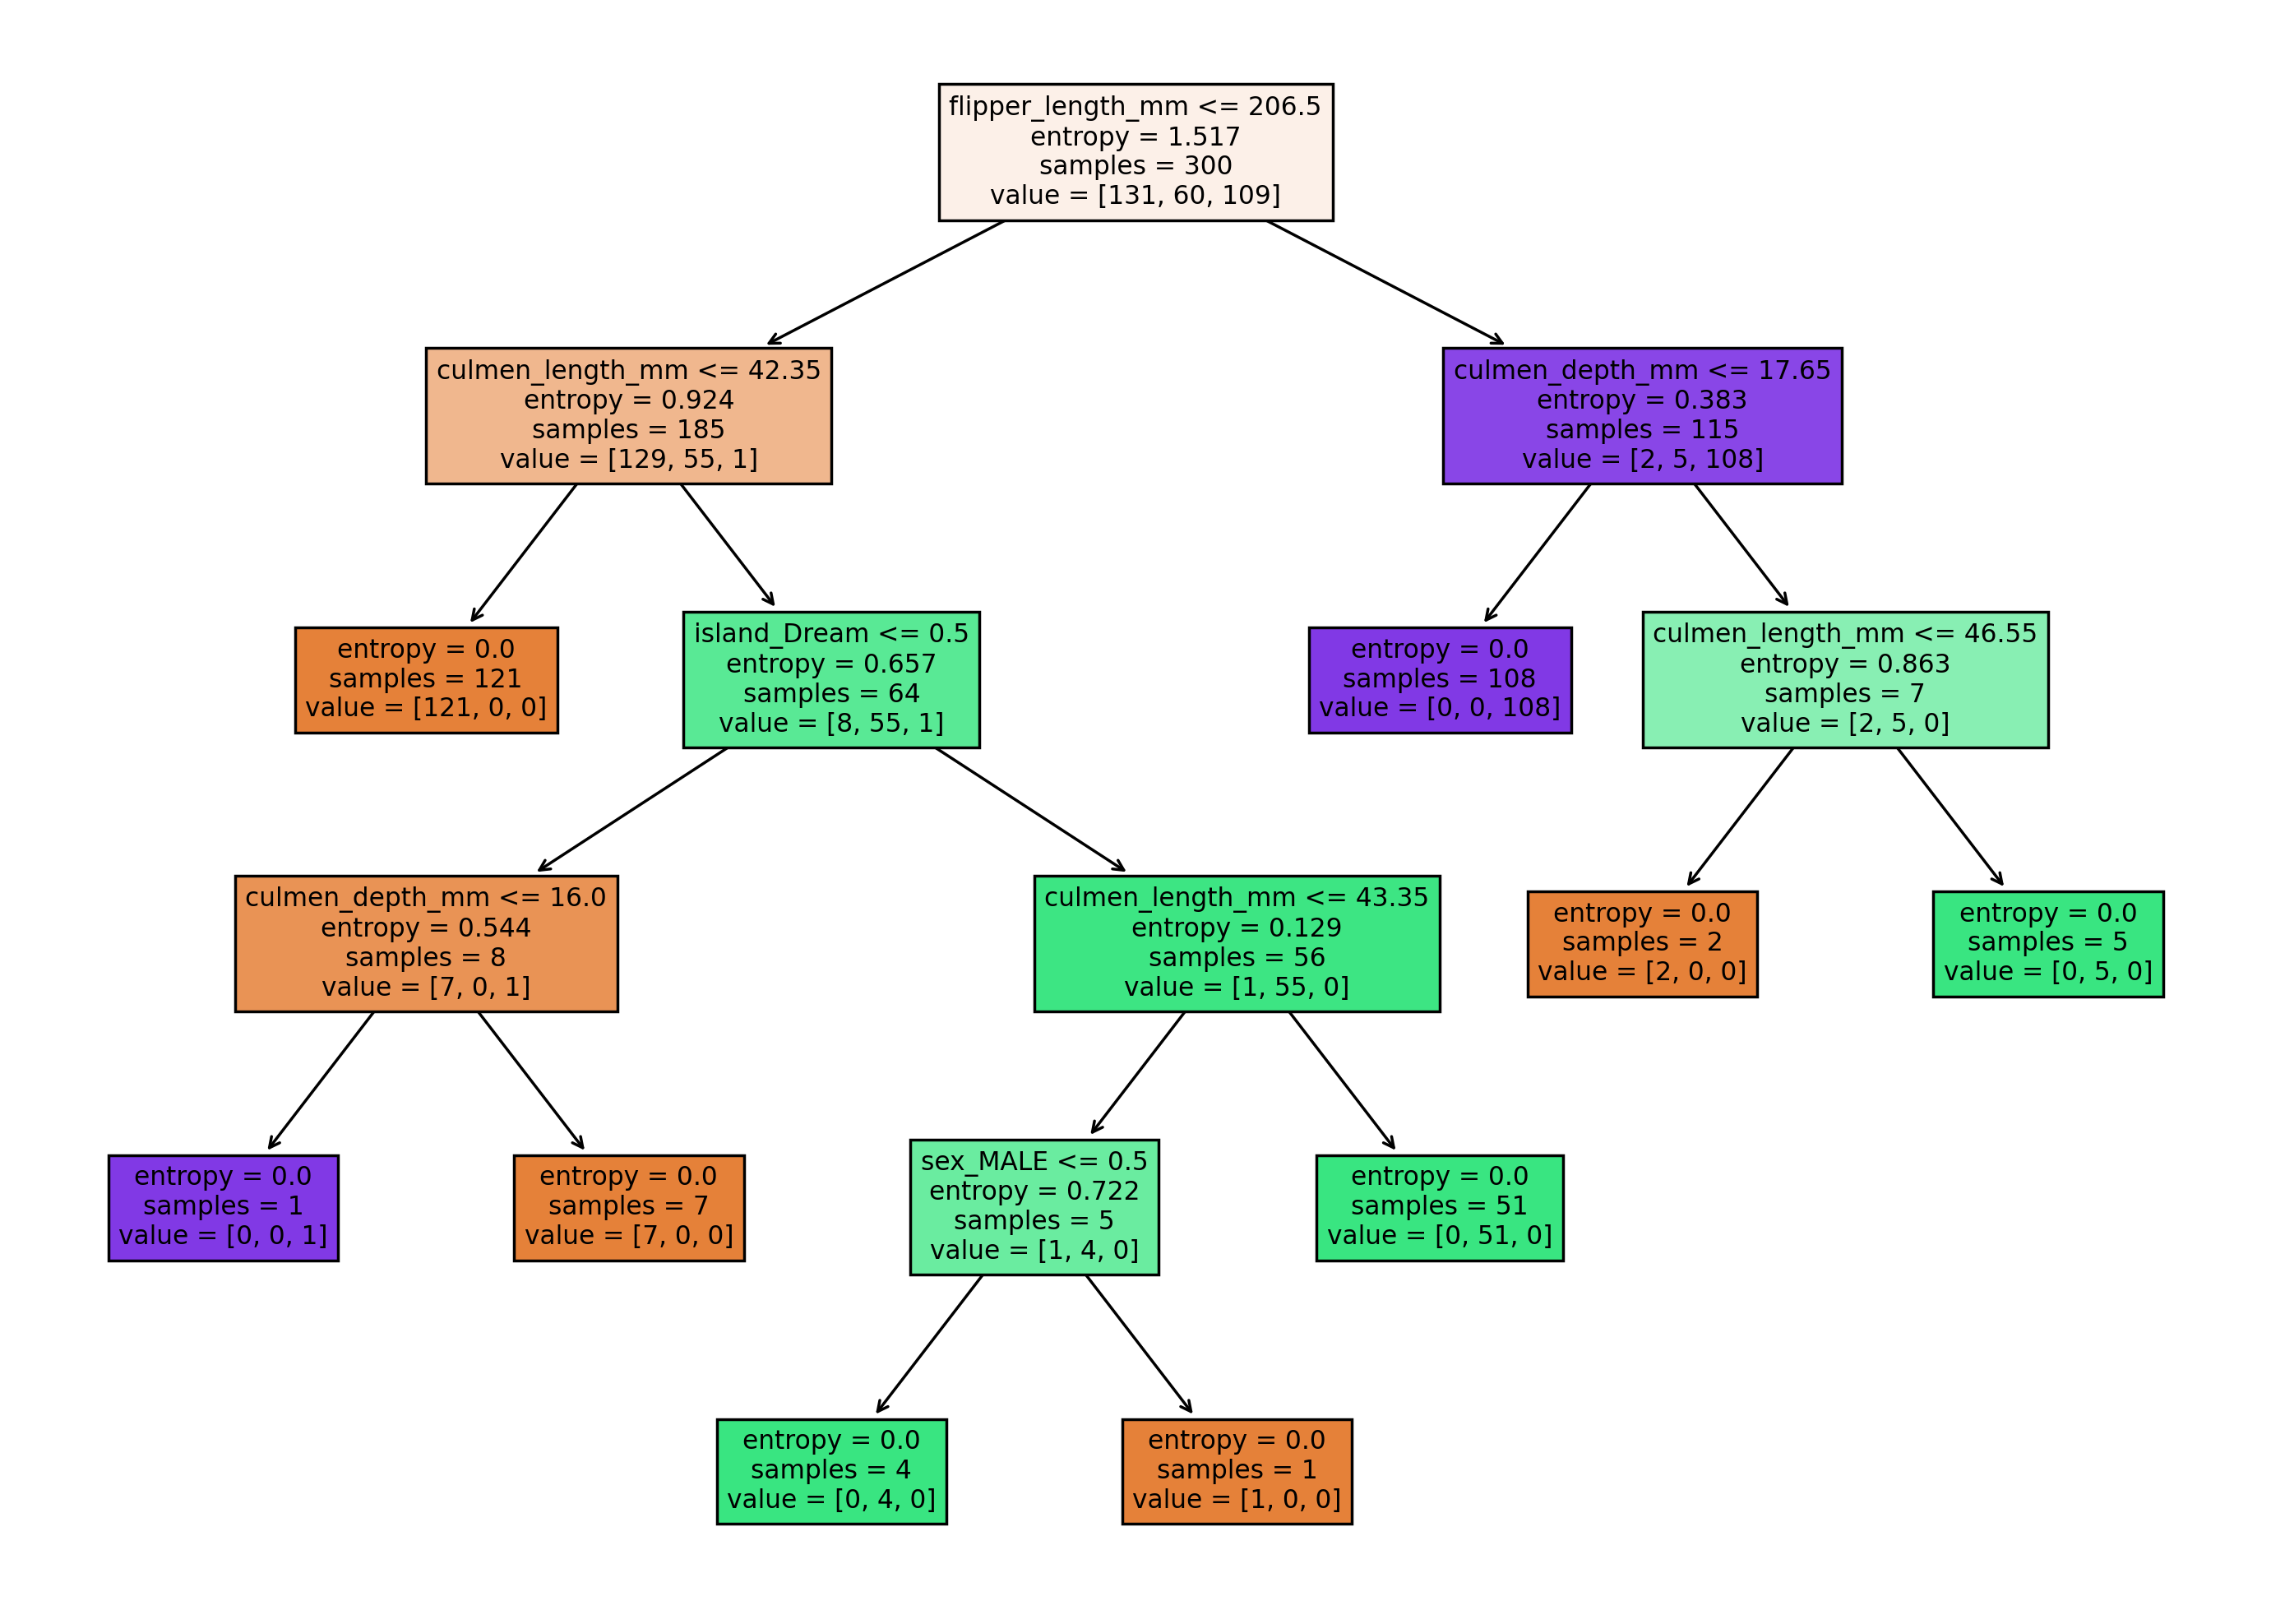

In [89]:
report_model(entropy_tree)

decision trees are prone to overfitting \
gradient boosted trees and random forests combat this issue